In [1]:
import os
import shutil
from pathlib import Path
from HandsFreeDocking.Wrapper_Docking import PipelineDocking
from HandsFreeDocking.tools.Ligand_Preparation import LigandPreparator

import datamol as dm
from rdkit import Chem

In [2]:
protein_pdb = Path("./examples/LAG3_Moloc_2.pdb")
ligands_sdf = Path("./examples/Ligands_Complex.sdf")

cystal_sdf = Path("./examples/Fake_Crystal.sdf")

docking_dir = Path("./examples/TMP_Docking")

In [3]:
if docking_dir.exists():
    shutil.rmtree(docking_dir, ignore_errors=True)

In [4]:
docking = PipelineDocking(
    workdir=docking_dir,
    docking_software=["plants", "rxdock"],
    settings=(10, 4),
    protein_pdb=protein_pdb,
    ligands_input=ligands_sdf,
    crystal_sdf=cystal_sdf,
    protonation_method="cdp",
    tautomer_score_threshold=2
)

In [5]:
results = docking.run()
FULL_DF = docking.concat_df()

2025-06-01 15:52:06,168 - HandsFreeDocking.Wrapper_Docking - INFO - Using SDF input directly: examples/Ligands_Complex.sdf
2025-06-01 15:52:06,170 - HandsFreeDocking.Wrapper_Docking - INFO - Starting Plants docking


Preparing protein with Chimera ...


2025-06-01 15:52:08,383 - HandsFreeDocking.Plants_Pipeline - INFO - Preparing ligands using cdp protonation method
2025-06-01 15:52:08,386 - HandsFreeDocking.tools.Ligand_Preparation - INFO - Processing Lig_Complex_1 from SDF
2025-06-01 15:52:08,532 - HandsFreeDocking.tools.Ligand_Preparation - INFO - Processing Lig_Complex_2 from SDF
2025-06-01 15:52:08,748 - HandsFreeDocking.tools.Ligand_Preparation - INFO - Processing Lig_Complex_3 from SDF
2025-06-01 15:52:08,790 - HandsFreeDocking.tools.Ligand_Preparation - INFO - Processing Lig_Complex_4 from SDF
2025-06-01 15:52:08,817 - HandsFreeDocking.tools.Ligand_Preparation - INFO - Processing Lig_Complex_5 from SDF
2025-06-01 15:52:08,841 - HandsFreeDocking.tools.Ligand_Preparation - INFO - Processing Lig_Complex_6 from SDF
2025-06-01 15:52:08,935 - HandsFreeDocking.Plants_Pipeline - INFO - Storing template SMILES mapping for MOL2 fixing
2025-06-01 15:52:08,939 - HandsFreeDocking.Plants_Pipeline - INFO - Converting prepared ligands to mol2

Preparing protein with Chimera ...


2025-06-01 15:52:21,899 - HandsFreeDocking.RxDock_Pipeline - INFO - Step 3: Defining binding site...
2025-06-01 15:52:21,900 - HandsFreeDocking.RxDock_Pipeline - INFO - Creating RxDock parameter file and defining binding site...
2025-06-01 15:52:21,900 - HandsFreeDocking.RxDock_Pipeline - INFO - Running command: rbcavity -W -d -r examples/TMP_Docking/Rxdock/rxdock.prm
2025-06-01 15:52:22,685 - HandsFreeDocking.RxDock_Pipeline - INFO - ***********************************************
The RxDock molecular docking program is licensed under GNU LGPL version 3.
RxDock is maintained by Vedran Miletić, Patrik Nikolić, and Luka Vretenar.
Visit https://www.rxdock.org/ for more information.
Executable:	rbcavity/0.1.0
Library:	librxdock.so/0.1.0
RBT_ROOT:	/home/hitesit/Software/rxdock/rxdock_installation
RBT_HOME:	/home/hitesit/Python_Packages/Docking_Pipelines/HandsFreeDocking/examples/TMP_Docking/Rxdock
Current dir:	/home/hitesit/Python_Packages/Docking_Pipelines/HandsFreeDocking
Date:		Sun Jun 

In [6]:
FULL_DF

,ID,Score,Molecule,Software,Protein_Path
0,Lig_Complex_Plants-P1,0.238688,<rdkit.Chem.rdchem.Mol object at 0x7f4585640c80>,plants,/home/hitesit/Python_Packages/Docking_Pipeline...
1,Lig_Complex_Plants-P2,0.293656,<rdkit.Chem.rdchem.Mol object at 0x7f4585640120>,plants,/home/hitesit/Python_Packages/Docking_Pipeline...
2,Lig_Complex_Plants-P3,0.300960,<rdkit.Chem.rdchem.Mol object at 0x7f4585640190>,plants,/home/hitesit/Python_Packages/Docking_Pipeline...
3,Lig_Complex_Plants-P4,0.335066,<rdkit.Chem.rdchem.Mol object at 0x7f45856403c0>,plants,/home/hitesit/Python_Packages/Docking_Pipeline...
4,Lig_Complex_Plants-P5,0.409517,<rdkit.Chem.rdchem.Mol object at 0x7f4585640660>,plants,/home/hitesit/Python_Packages/Docking_Pipeline...
...,...,...,...,...,...
165,Lig_Complex_6_Iso0_Taut0_RxDock-P6,0.843387,<rdkit.Chem.rdchem.Mol object at 0x7f4585333a70>,rxdock,/home/hitesit/Python_Packages/Docking_Pipeline...
166,Lig_Complex_6_Iso0_Taut0_RxDock-P7,0.764593,<rdkit.Chem.rdchem.Mol object at 0x7f4585333b50>,rxdock,/home/hitesit/Python_Packages/Docking_Pipeline...
167,Lig_Complex_6_Iso0_Taut0_RxDock-P8,0.760370,<rdkit.Chem.rdchem.Mol object at 0x7f4585333c30>,rxdock,/home/hitesit/Python_Packages/Docking_Pipeline...
168,Lig_Complex_6_Iso0_Taut0_RxDock-P9,0.675106,<rdkit.Chem.rdchem.Mol object at 0x7f4585333d10>,rxdock,/home/hitesit/Python_Packages/Docking_Pipeline...


In [7]:
ligand = "examples/TMP_Docking/Plants/output/Lig_Complex_2_Iso0_Taut0_Plants.sdf"

In [13]:
def has_unknown_atoms_in_sdf(sdf_file_path: Path):
    """
    Check if any molecule in an SDF file contains unknown atoms (*).
    
    Parameters:
    -----------
    sdf_file_path : str
        Path to the SDF file
        
    Returns:
    --------
    bool
        True if any molecule contains unknown atoms, False otherwise
    """
    from rdkit import Chem
    
    # Create supplier without sanitization
    supplier = Chem.SDMolSupplier(str(sdf_file_path), sanitize=False)
    
    for mol_idx, mol in enumerate(supplier):
        # Skip if molecule couldn't be parsed
        if mol is None:
            continue
            
        # Check each atom in the molecule
        for atom in mol.GetAtoms():
            if atom.GetAtomicNum() == 0:  # Atomic number 0 indicates a dummy/unknown atom
                return True
    
    return False

In [14]:
has_unknown_atoms_in_sdf(ligand)

True

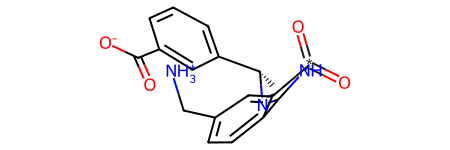

In [9]:
dm.read_sdf(ligand)[0]

## Ligand Preparation

In [ ]:
smiles_to_test = [
    "C1C(C[NH3+])=CC2=C(C(N[C@@H](C3C=CC=C(C(=O)[O-])C=3)C)=NS2(=O)=O)C=1",
    "C1C(C[NH3+])=CC2=C(C(NC(C3C=CC=C(C(=O)[O-])C=3)C)=NS2(=O)=O)C=1",
    "N1C=C(C2CC2)C(=O)NC1=O",
    "C1C=CN2C(NC(C)C)=C(CC)N=C2C=1",
    "C1C=CN2C(NC(C)C)=CN=C2C=1",
    "C1=CC(=CC=C1C2=CC(=O)C3=C(C=C(C=C3O2)O)O)O"
]

names_of_smiles = [f"Lig_Complex_{i+1}" for i in range(len(smiles_to_test))]

assert len(smiles_to_test) == len(names_of_smiles), "The number of SMILES and names must match."

In [ ]:
preparator = LigandPreparator(
    protonation_method="cdp",
    enumerate_stereo=True,
    tautomer_score_threshold=None,
    generate_3d=True
)

# Prepare molecules from SDF
prepared_mols = preparator.prepare_from_smiles(smiles_to_test, names_of_smiles)
print(len(prepared_mols), "molecules prepared from SMILES.")

## MOL2 -> SDF Conv

In [ ]:
import os
import shutil
from pathlib import Path
from HandsFreeDocking.Wrapper_Docking import PipelineDocking
from HandsFreeDocking.tools.Ligand_Preparation import LigandPreparator

In [ ]:
from HandsFreeDocking.tools.Fix_Mol2 import hard_fix_mol2
from rdkit import Chem
from rdkit.Chem import AllChem
import datamol as dm
from typing import List, Tuple, Optional

In [ ]:
mol2_example = Path("examples/TMP_Docking/Plants/output_plants/Apigenin_Iso0/docked_ligands.mol2")
assert mol2_example.exists(), f"Expected {mol2_example} to exist."

smiles_example = "C1=CC(=CC=C1C2=CC(=O)C3=C(C=C(C=C3O2)O)O)O"

In [ ]:
fixed_mols = hard_fix_mol2(mol2_example, smiles_example)